# Python Programming Final Assignment
Benjamin MAUREAU - 57514

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/BenjaminMAUREAU/Docs/DA&AI/S2/Python Programming/card_debt_exam.csv',sep=',')

Let's first see what our dataset looks like:

In [3]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,AvgDebt
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


We choose to create age groups to see if the debt could depend on the belonging to a specific age group:

In [4]:
def split_age_group(x):
    idx_group = int(x // 10)
    name_group = "{} to {}".format(idx_group*10, (idx_group+1)*10) 
    return name_group
data["Age_group"] = data["Age"].apply(split_age_group)

avgdebt = data.groupby("Age_group")["AvgDebt"].mean()
print(avgdebt)

Age_group
20 to 30      519.291667
30 to 40      447.866667
40 to 50      612.610390
50 to 60      568.507463
60 to 70      507.464789
70 to 80      374.737705
80 to 90      573.421053
90 to 100    1365.500000
Name: AvgDebt, dtype: float64


We can see that we have very different means depending on the age group. 

We will see later if this difference is significant to explain the variation of the debt.

We also create a new feature corresponding to the work experience.

In [5]:
data.insert(loc=6,column='Experience',value=data['Age']-data['Education'])

In [6]:
data.head()


,Income,Limit,Rating,Cards,Age,Education,Experience,Gender,Student,Married,Ethnicity,AvgDebt,Age_group
0,14.891,3606,283,2,34,11,23,Male,No,Yes,Caucasian,333,30 to 40
1,106.025,6645,483,3,82,15,67,Female,Yes,Yes,Asian,903,80 to 90
2,104.593,7075,514,4,71,11,60,Male,No,No,Asian,580,70 to 80
3,148.924,9504,681,3,36,11,25,Female,No,No,Asian,964,30 to 40
4,55.882,4897,357,2,68,16,52,Male,No,Yes,Caucasian,331,60 to 70


Let's see if we have some missing values:

In [7]:
data.isna().sum()

Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Experience    0
Gender        0
Student       0
Married       0
Ethnicity     0
AvgDebt       0
Age_group     0
dtype: int64

We don't have any, so we can start analyzing our quantitative features.

# Quantitative analysis
Let's display a heatmap of the correlation between the quantitative features:

In [8]:
mat_cor = data.corr()

<AxesSubplot:>

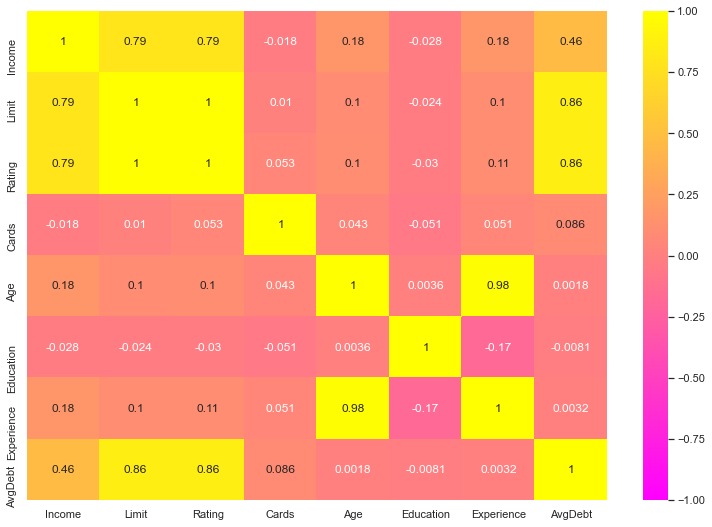

In [9]:
plt.figure(figsize=(13,9))
sns.set(font_scale=1.0)
sns.heatmap(mat_cor,cmap = "spring", vmax = 1, vmin = -1, annot = True)

We can see that Income, Limit, Rating are individually positively and significantly correlated with the AvgDebt.

However, Limit and Rating are highly correlated and have respectively the same correlation with AvgDebt.

So we won't keep both the features to avoid homoscedasticity. We choose to keep only Rating and Income as quantitative variables. 

Here, we display visually the correlation between our selected features and the average debt:

Text(0.5, 1.0, 'Rating impact on Debt')

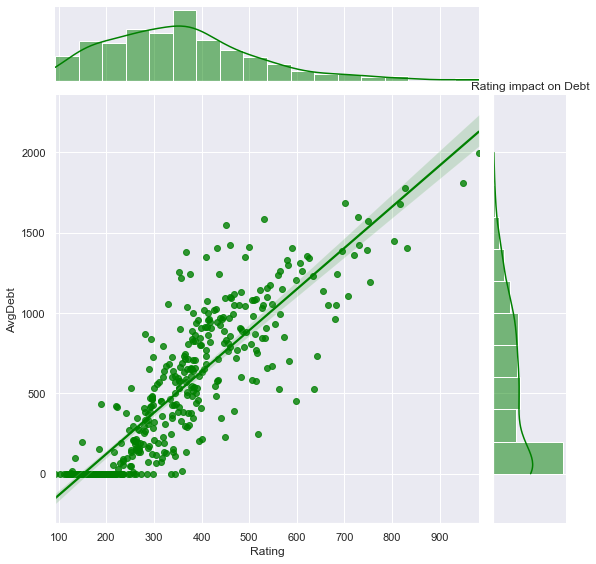

In [10]:
sns.jointplot(data = data, x = "Rating", y = "AvgDebt", height = 8, 
             kind = "reg",color = 'green');
plt.title('Rating impact on Debt')

Text(0.5, 1.0, 'Income impact on Debt')

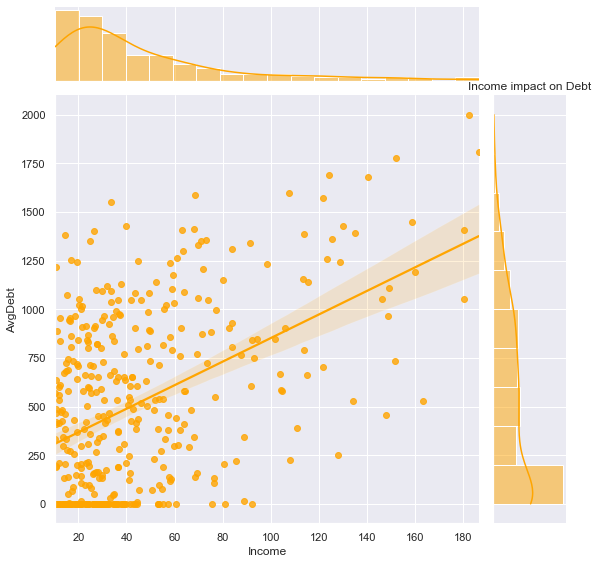

In [11]:
sns.jointplot(data=data,x='Income',y='AvgDebt',height=8,kind = 'reg',color='orange')
plt.title('Income impact on Debt')

Now that we know the two quantitative variables we will add to our model, we can focus on analyzing the categorical variables.

# Categorical analysis
First of all, let's see what is the type of our categorical variables so that we can analyze them properly:

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      400 non-null    float64
 1   Limit       400 non-null    int64  
 2   Rating      400 non-null    int64  
 3   Cards       400 non-null    int64  
 4   Age         400 non-null    int64  
 5   Education   400 non-null    int64  
 6   Experience  400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  AvgDebt     400 non-null    int64  
 12  Age_group   400 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 40.8+ KB


Let's change the type of our object features into categorical features:

In [13]:
data[['Ethnicity','Gender','Married','Student','Age_group']] = data[['Ethnicity','Gender','Married','Student','Age_group']].astype('category')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Income      400 non-null    float64 
 1   Limit       400 non-null    int64   
 2   Rating      400 non-null    int64   
 3   Cards       400 non-null    int64   
 4   Age         400 non-null    int64   
 5   Education   400 non-null    int64   
 6   Experience  400 non-null    int64   
 7   Gender      400 non-null    category
 8   Student     400 non-null    category
 9   Married     400 non-null    category
 10  Ethnicity   400 non-null    category
 11  AvgDebt     400 non-null    int64   
 12  Age_group   400 non-null    category
dtypes: category(5), float64(1), int64(7)
memory usage: 27.9 KB


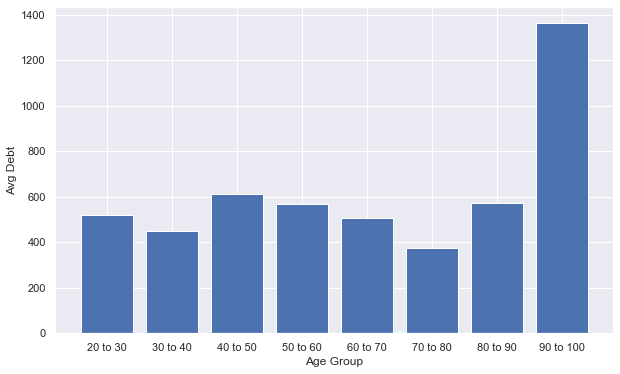

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(avgdebt.index, avgdebt.values)
plt.xlabel('Age Group')
plt.ylabel('Avg Debt')
plt.show()

We can see that the age groups with lower debts are those between 30 and 40 years old and between 70 and 80 years. 

The high average debt of the 90-100 years old might be due to outliers. We will see later if this variable is significant.

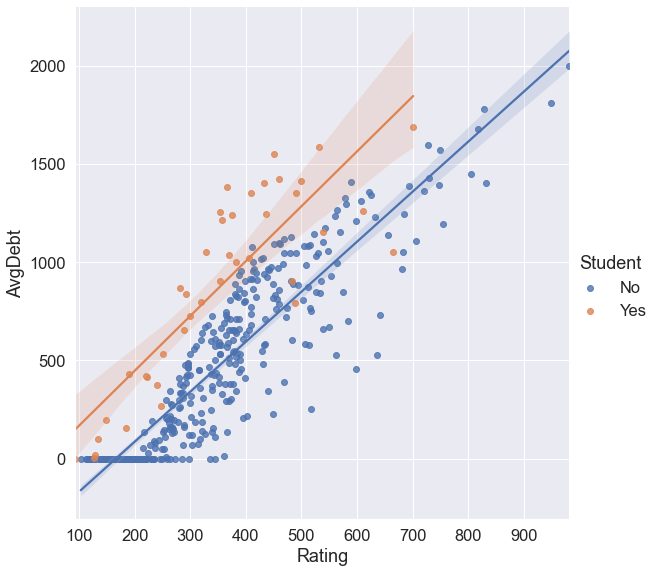

In [16]:
sns.set(font_scale=1.5)
sns.lmplot(data=data,x='Rating',y='AvgDebt',hue = 'Student',height=8)

There seem to be a high bias depending on whether your are a student or not in the rating of your credit and your average debt.

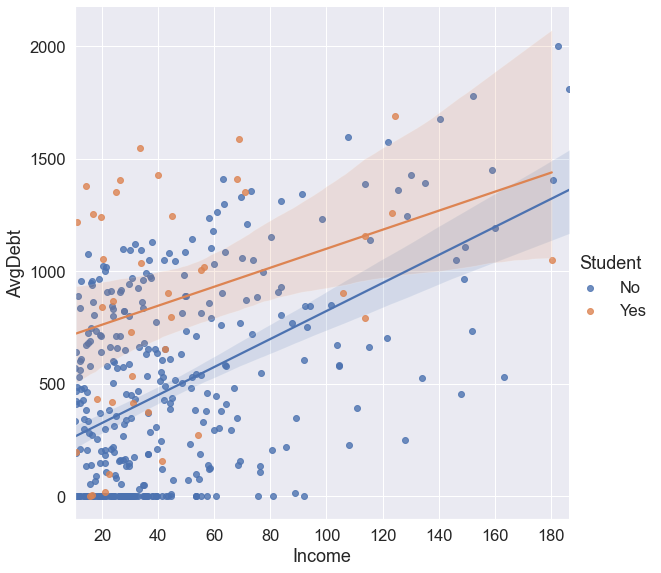

In [17]:
sns.set(font_scale=1.5)
sns.lmplot(data=data,x='Income',y='AvgDebt',hue = 'Student',height=8)

Text(0.5, 0, 'Student')

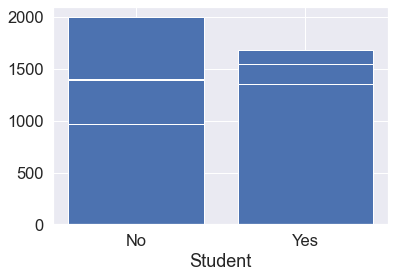

In [18]:
plt.bar(x='Student',height='AvgDebt',data=data)
plt.xlabel('Student')

We can see in this graphs a high difference between the debt of the student and the debt of the non students.

We will probably keep this variable in our model.

In [19]:
data.groupby('Student')['AvgDebt'].describe()

,count,mean,std,min,25%,50%,75%,max
Student,,,,,,,,
No,360.0,480.369444,439.414538,0.0,13.25,424.0,807.5,1999.0
Yes,40.0,876.825000,490.001983,0.0,428.00,953.0,1256.0,1687.0


We can see however that there is a high difference between the average debt of the non students and the debt of the students.

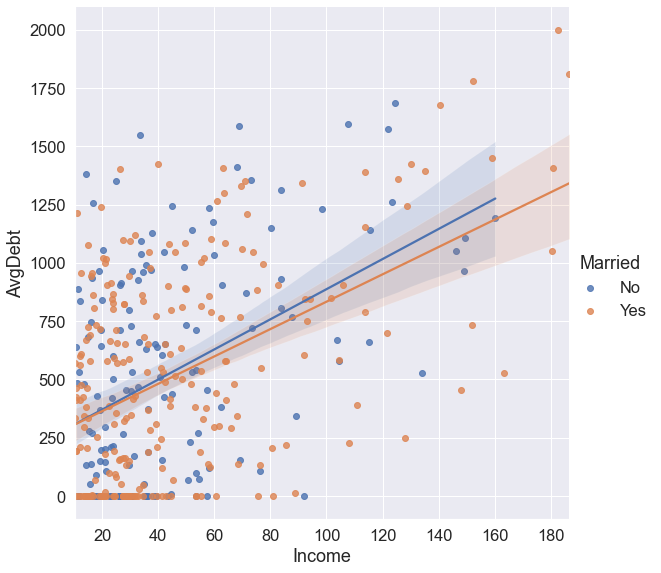

In [20]:
sns.set(font_scale=1.5)
sns.lmplot(data=data,x='Income',y='AvgDebt',hue = 'Married',height=8)

We can see here that the difference between married or not is not very significative. This feature will probably be ommitted.

In [21]:
data.groupby('Married')['AvgDebt'].describe()

,count,mean,std,min,25%,50%,75%,max
Married,,,,,,,,
No,155.0,523.290323,470.887501,0.0,51.0,467.0,910.0,1687.0
Yes,245.0,517.942857,453.538010,0.0,81.0,454.0,844.0,1999.0


This little gap between the two means seems to confirm our hypothesis that the married feature is not significant.

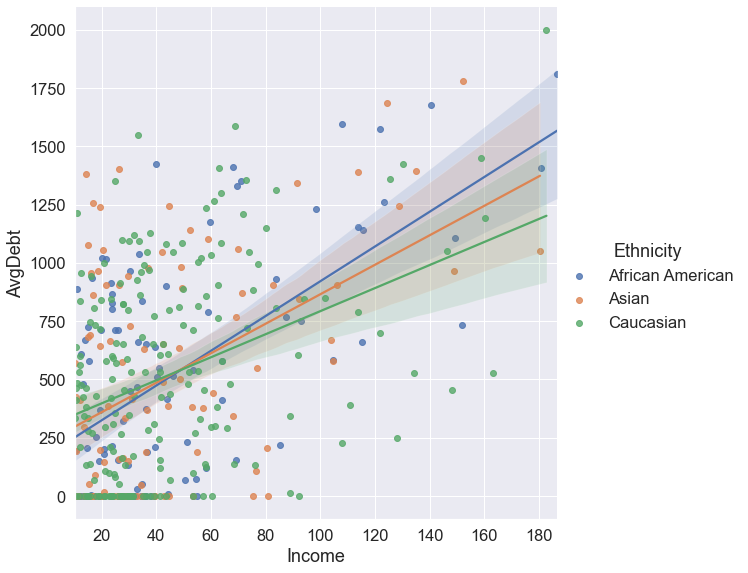

In [22]:
sns.set(font_scale=1.5)
sns.lmplot(data=data,x='Income',y='AvgDebt',hue = 'Ethnicity',height=8)

Here we could think that the ethnicity can explain a variation of the average debt depending on the income.

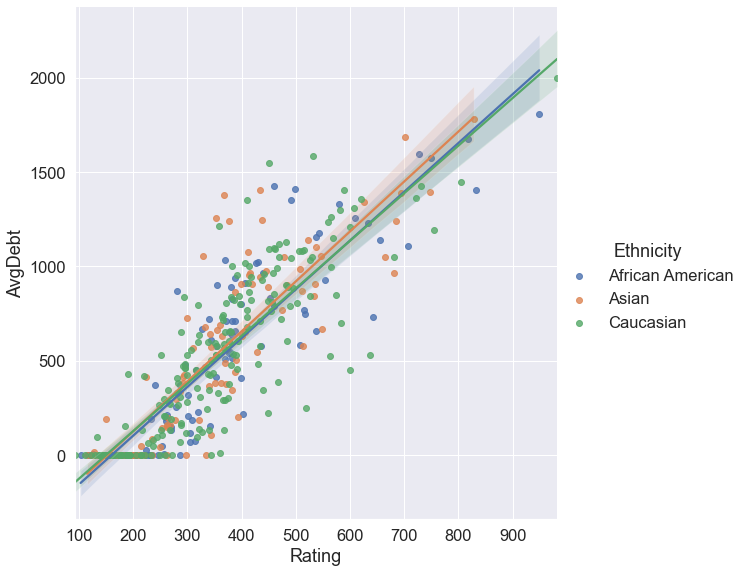

In [23]:
sns.set(font_scale=1.5)
sns.lmplot(data=data,x='Rating',y='AvgDebt',hue = 'Ethnicity',height=8)

Here it seems that the ethnicity of the ratings has no impact on the average debt.

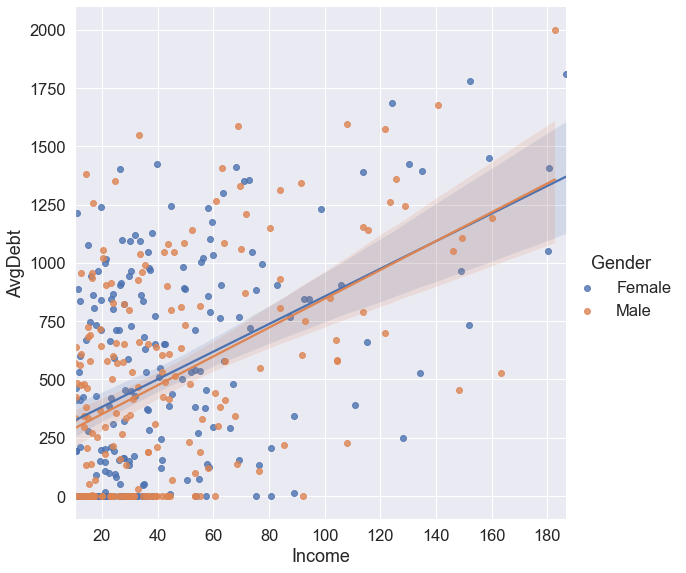

In [24]:
sns.set(font_scale=1.5)
sns.lmplot(data=data,x='Income',y='AvgDebt',hue = 'Gender',height=8)

We can see here that the difference between male and female is not very significative. This feature will also probably be ommitted.

In [25]:
data.groupby('Gender')['AvgDebt'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,207.0,529.536232,458.461672,0.0,92.0,456.0,887.0,1809.0
Male,193.0,509.803109,462.119644,0.0,5.0,463.0,815.0,1999.0


Once again, we can see that the gap between male and female is not very high so this feature won't probably be kept.

In [26]:
data.groupby(['Ethnicity','Gender'])['AvgDebt'].mean().unstack()

Gender,Female,Male
Ethnicity,,
African American,509.000000,553.448980
Asian,563.109091,452.872340
Caucasian,521.500000,515.340206


An interesting thing we can see here is that on average, the asian male have a very lower debt than the other groups.

In [27]:
data.groupby('Age_group')['AvgDebt'].describe().sort_values(by = 'mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Age_group,,,,,,,,
90 to 100,2.0,1365.500000,895.904292,732.0,1048.75,1365.5,1682.25,1999.0
40 to 50,77.0,612.610390,471.253205,0.0,293.00,570.0,863.00,1809.0
80 to 90,38.0,573.421053,481.187306,0.0,69.25,554.5,923.50,1597.0
50 to 60,67.0,568.507463,509.676022,0.0,80.00,531.0,956.00,1687.0
20 to 30,24.0,519.291667,375.598824,0.0,182.25,591.5,822.00,1120.0
60 to 70,71.0,507.464789,438.264168,0.0,92.00,415.0,897.00,1448.0
30 to 40,60.0,447.866667,439.682878,0.0,0.00,364.5,683.00,1426.0
70 to 80,61.0,374.737705,384.809256,0.0,0.00,246.0,653.00,1230.0


Finally, regarding the age groups, we see indeed that the high debt for the 90-100 years old group is due to 2 people which is not enough to make this assumption significant.

# Dummies

Let's transform the categorical variables now into dummies to make their interpretation and their integration to our model easier:

In [28]:
data_dum=pd.get_dummies(data=data,drop_first=True)

In [29]:
data_dum.head()

,Income,Limit,Rating,Cards,Age,Education,Experience,AvgDebt,Gender_Male,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Age_group_30 to 40,Age_group_40 to 50,Age_group_50 to 60,Age_group_60 to 70,Age_group_70 to 80,Age_group_80 to 90,Age_group_90 to 100
0,14.891,3606,283,2,34,11,23,333,1,0,1,0,1,1,0,0,0,0,0,0
1,106.025,6645,483,3,82,15,67,903,0,1,1,1,0,0,0,0,0,0,1,0
2,104.593,7075,514,4,71,11,60,580,1,0,0,1,0,0,0,0,0,1,0,0
3,148.924,9504,681,3,36,11,25,964,0,0,0,1,0,1,0,0,0,0,0,0
4,55.882,4897,357,2,68,16,52,331,1,0,1,0,1,0,0,0,1,0,0,0


<AxesSubplot:>

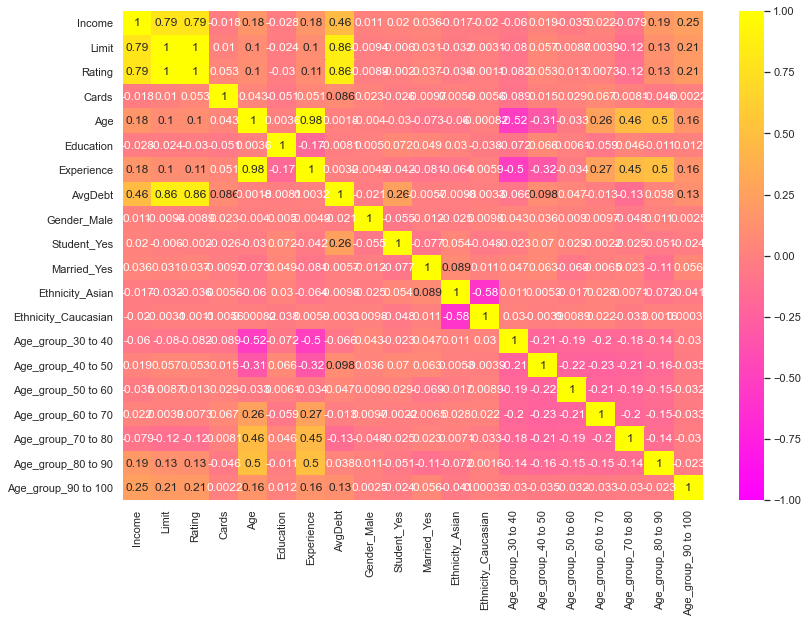

In [30]:
mat_cor_dum = data_dum.corr()
plt.figure(figsize=(13,9))
sns.set(font_scale=1.0)
sns.heatmap(mat_cor_dum,cmap = "spring", vmax = 1, vmin = -1, annot = True)


We can see on this new heatmap of the correlations that the feature Student is positively correlated with the debt, hence we will keep it.

The 90-100 years old group is also positively correlated but not representative enough of the whole sample.

As a conclusion, we keep the following variables to explain our model: Income, Rating and Student_Yes.


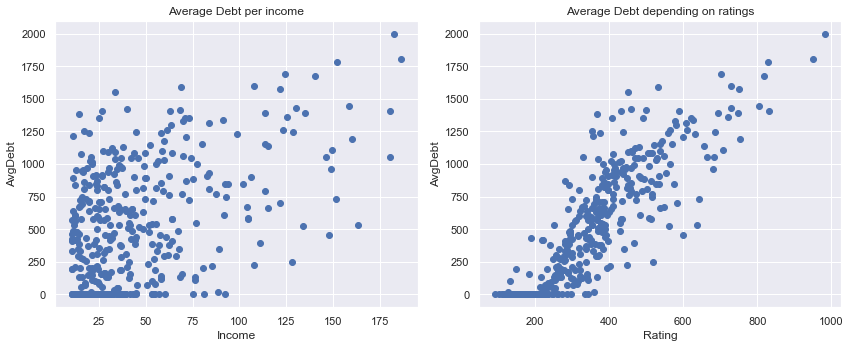

In [31]:
fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (12, 5))

axes[0].plot(data['Income'], data['AvgDebt'], 'o')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('AvgDebt')
axes[0].set_title('Average Debt per income')

axes[1].plot(data['Rating'], data['AvgDebt'], 'o')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('AvgDebt')
axes[1].set_title('Average Debt depending on ratings')

plt.tight_layout()

plt.show()

Here we can have an overview of the relationships between the features.


# Multiple Linear Regression with Statsmodels

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Here we create our dataset that will be used in the Multiple Linear Regression.

We have added the feature Age because we have noticed in the following tests that it's p-value is below 5% and as a result it is a significant variable.

In [33]:
X = data_dum[['Income','Rating','Student_Yes','Age']]


In [34]:
y=data_dum['AvgDebt']

In [35]:
X.head()

,Income,Rating,Student_Yes,Age
0,14.891,283,0,34
1,106.025,483,1,82
2,104.593,514,0,71
3,148.924,681,0,36
4,55.882,357,0,68


In [36]:
y.head()

0    333
1    903
2    580
3    964
4    331
Name: AvgDebt, dtype: int64

We add a constant to X so that it will take into account the intercept:

In [37]:
X=sm.add_constant(X)


In [38]:
X.head()

,const,Income,Rating,Student_Yes,Age
0,1.0,14.891,283,0,34
1,1.0,106.025,483,1,82
2,1.0,104.593,514,0,71
3,1.0,148.924,681,0,36
4,1.0,55.882,357,0,68


We build and fit our model and then look at the summary of it:

In [39]:
model=sm.OLS(y,X)


In [40]:
results = model.fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1892.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          4.17e-256
Time:                        19:53:11   Log-Likelihood:                -2418.6
No. Observations:                 400   AIC:                             4847.
Df Residuals:                     395   BIC:                             4867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -547.3047     21.461    -25.503      0.000    -589.496    -505.113
Income         -7.7977      0.242    -32.198      0.000      -8.274      -7.322
Rating          3.9807      0.055     72.927      0.000       3.873       4.088
Student_Yes   417.5056     17.172     24.314      0.000     383.746     451.265
Age            -0.6242      0.304     -2.053      0.041      -1.222      -0.026
==============================================================================
Omnibus:                       15.838   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.000
Skew:                           0.494   Prob(JB):                     0.000203
Kurtosis:                       2.793   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We notice that all the features we selected are significant to explain the variation of the average debt.

Age and Income have a negative impact on debt while rating and the fact of being student have a positive one. 

Here we proceed to a similar analysis by only declaring which of our variables are categorical ones:

In [42]:
model = ols(formula='AvgDebt ~ Income + Rating + Age + C(Student)',data=data)


In [43]:
results=model.fit()

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1892.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          4.17e-256
Time:                        19:53:11   Log-Likelihood:                -2418.6
No. Observations:                 400   AIC:                             4847.
Df Residuals:                     395   BIC:                             4867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -547.3047     21.461    -25.503      0.000    -589.496    -505.113
C(Student)[T.Yes]   417.5056     17.172     24.314      0.000     383.746     451.265
Income               -7.7977      0.242    -32.198      0.000      -8.274      -7.322
Rating                3.9807      0.055     72.927      0.000       3.873       4.088
Age                  -0.6242      0.304     -2.053      0.041      -1.222      -0.026
==============================================================================
Omnibus:                       15.838   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.000
Skew:                           0.494   Prob(JB):                     0.000203
Kurtosis:                       2.793   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
print('R-squared: ', results.rsquared)
print('Adjusted R-squared: ', results.rsquared_adj)
print('Regression Coefficients: \n', results.params)

R-squared:  0.9504078253308544
Adjusted R-squared:  0.9499056260936986
Regression Coefficients: 
 Intercept           -547.304701
C(Student)[T.Yes]    417.505640
Income                -7.797732
Rating                 3.980730
Age                   -0.624179
dtype: float64


As expected we find the same coefficients in the two ways.

Moreover, we find an excellent r-squared which is equal to 95%. This mean that our model can explain 95% of the variation of debt.

# Multiple Linear Regression with Machine Learning
Let's now compute a multiple linear regression with Machine Learning tools to see if we find different results.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = data_dum[['Income','Rating','Student_Yes','Age']]

In [48]:
X.head()

,Income,Rating,Student_Yes,Age
0,14.891,283,0,34
1,106.025,483,1,82
2,104.593,514,0,71
3,148.924,681,0,36
4,55.882,357,0,68


In order to carry the multiple linear regression out, we divide our dataset into a train and a test one.

The size of our test size will be 30% of the whole dataset.

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 4), (120, 4), (280,), (120,))

In [51]:
120/(120+280)


0.3

30% is indeed the size of the test set.

Given that there are large gaps between the different quantitative features, we standardize our data.

We fit and apply on the train set first and then we apply this standardization to the test set:

In [52]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [53]:
X_train

array([[ 0.32981765,  0.30795568,  3.06110607,  0.87802091],
       [-0.90672909, -0.49237349, -0.3266793 , -1.21402989],
       [-0.24247802, -0.11426522, -0.3266793 ,  0.69870227],
       ...,
       [-0.83997092, -0.88308537, -0.3266793 , -1.09448413],
       [-0.91043627, -1.54477484, -0.3266793 ,  0.75847515],
       [ 0.69060142,  1.09568125,  3.06110607, -0.07834517]])

In [54]:
from sklearn.linear_model import LinearRegression

Let's build and fit our linear regression model now:

In [55]:
modelsk = LinearRegression()
results = modelsk.fit(X_train,y_train)

We can now predict the average debt with out model based on the test set:

In [56]:
modelsk.predict(X_test)

array([ 783.27055231,  520.65486544, -153.8572379 ,  197.8788634 ,
        848.57216744,    6.85734233,  795.60737896,  113.30137592,
        156.85370174, 1349.22376362, 1243.9567252 ,  456.96001047,
        448.24615385,  658.2476101 ,  858.69985641,  471.1298363 ,
        484.76730286,  797.11120828,  742.13776643,  794.68700795,
        282.47151006,   65.5846937 ,  738.25367187,  469.46913143,
        443.80577578,  488.97437937,  368.91717224,  948.36270005,
        509.43811857,  747.86243615,  560.33988226, 1322.72242866,
       1084.5413659 ,  291.26753606,  736.90233834, -106.48308177,
        784.29487355,  354.04793197,  691.16860617,  646.57631286,
        900.12289724, -213.88328037,  592.67979745,  623.78080348,
        600.50003995, 1276.69271472,   64.57190852,  569.68959845,
        114.27371072,  650.2212229 , 1169.76276239,  186.03436614,
        606.19301444,  482.43822142,  644.03759331,  371.30797251,
        566.35032837,  203.20108686,  801.13484693,  272.57538

In [57]:
test_predictions=modelsk.predict(X_test)

We import two metrics that will give us an idea of the performance of our model:

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

Let's display the repartition of the average debt:

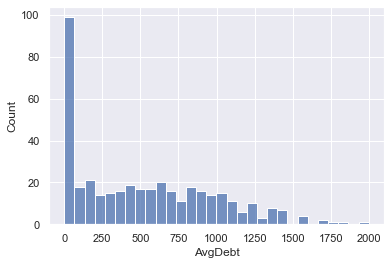

In [59]:
sns.histplot(x='AvgDebt',data=data,bins=30)
plt.show()

The MAE means that our prediction y belongs to the interval [y-77.88;y+77.88]:

In [60]:
mean_absolute_error(y_test,test_predictions)

77.88073741413548

In [61]:
data['AvgDebt'].mean()

520.015

In [62]:
77.88/520.02

0.14976347063574477

By deviding the MAE by the mean of the average debt we get the error range which is about 15%.

In [63]:
mean_squared_error(y_test,test_predictions)


8632.099674602265

We cannot directly compared this result to our predictions because it is squarred units, so we will analyze the square root of it, the RMSE.

In [64]:
np.sqrt(mean_squared_error(y_test,test_predictions))

92.90909360553607

The RMSE can be interpreted as  the standard deviation of the predictions of the model, while the MSE can be interpreted as the variance of the predictions.

It means that there is on average a gap of 92.9 between the predictions data points and their mean.

# Residuals
Let's analyze the residuals to conclude about the performance of our model. The residuals are equal to difference between the observed values and the predicted ones.

In [65]:
test_residuals = y_test - test_predictions

In [66]:
test_residuals

209    -51.270552
280     20.345135
33     153.857238
210   -102.878863
93      88.427833
          ...    
60      25.878052
79      16.923590
285     89.684307
305    101.015037
281    109.254266
Name: AvgDebt, Length: 120, dtype: float64

Let's plot the residuals:

<AxesSubplot:xlabel='AvgDebt', ylabel='AvgDebt'>

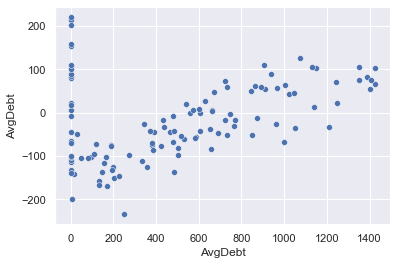

In [67]:
sns.scatterplot(x=y_test,y=test_residuals)

The residuals do not seem very correlated which is a good thing for our model.

Text(0.5, 1.0, 'Residuals Scatter Plot')

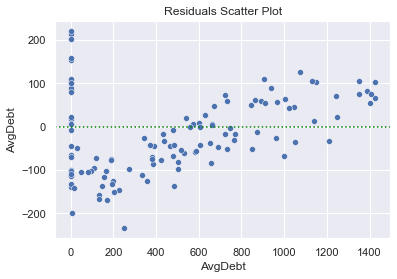

In [68]:
sns.scatterplot(x=y,y=test_residuals)
plt.axhline(y=0,color='green',linestyle=':')
plt.title('Residuals Scatter Plot')

By plotting the residuals and a horizontal line at y=0, we can see that the residuals are well distributed around 0. 

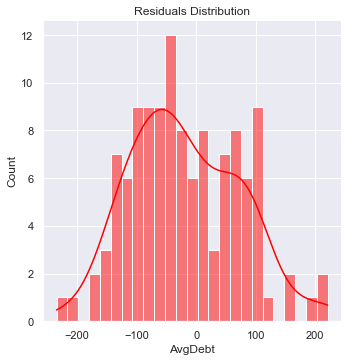

In [69]:
sns.displot(test_residuals, bins = 25, kde = True,color='red')
plt.title('Residuals Distribution')
plt.show()

We can see that the distribution of the residuals looks like a normal distribution around 0 which validates our model.

In [70]:
import scipy as sp

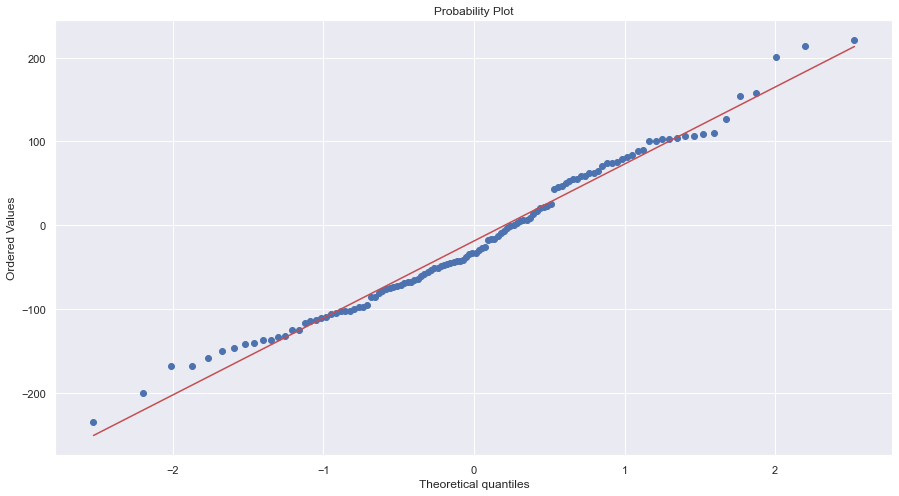

In [71]:
fig, ax = plt.subplots(figsize = (15, 8))
fig = sp.stats.probplot(test_residuals, plot = ax)

We can see by plotting their distribution that they are close to a normal one.

# Final model
We build a last model with all the data of the sample not dividing anymore between train and test sets.

In [72]:
final_model=LinearRegression()

In [73]:
final_model.fit(X,y)

LinearRegression()

In [74]:
X.head()

,Income,Rating,Student_Yes,Age
0,14.891,283,0,34
1,106.025,483,1,82
2,104.593,514,0,71
3,148.924,681,0,36
4,55.882,357,0,68


In [75]:
final_model.coef_

array([ -7.79773241,   3.98073024, 417.50564008,  -0.62417911])

The interesting point is that by displaying the coefficients of our model, we notice that they are the same as the model obtained with Statmodels.

In [76]:
final_predictions = final_model.predict(X)

In [77]:
final_predictions

array([ 441.90383483,  914.9563811 ,  638.88570157,  979.83264554,
        395.61893402, 1044.44683178,  296.88861526,  879.7051255 ,
        352.43301991, 1245.03348245, 1286.6221129 , -155.2282746 ,
        356.90280975, 1115.64313013,  327.41851212,   56.61449202,
        127.67621196,  474.50845106,  832.0518375 , 1003.88042289,
        210.82375868,  939.69914484,  105.75810052,  507.79992566,
        -45.65223389,  624.93883096,  661.99060539,  495.10355036,
       1749.4949663 ,  845.3649791 ,  801.17029159,   36.13477462,
        617.57829637, -165.74324758,   72.13183147,  533.29976444,
        732.93097029, 1014.73775678,  539.33564049,  367.85601093,
        153.58363092, 1084.355521  ,  464.40352557,  921.17749861,
       1055.60975324, 1063.22966716, 1174.7105361 ,  765.31227945,
       -123.36653938,  909.75706149,  635.32394837,  324.43330089,
        656.43052226,  928.40683935, -146.86297674, -228.39315021,
        438.96627945,  278.29521216,  446.85023849,  550.13761

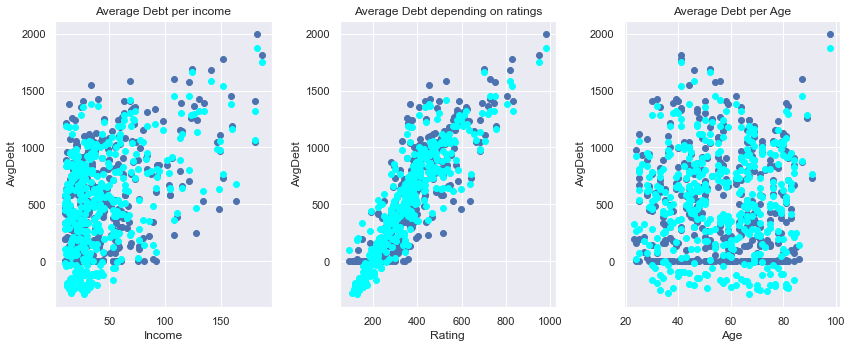

In [78]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (12, 5))

axes[0].plot(data['Income'], data['AvgDebt'], 'o')
axes[0].plot(data['Income'], final_predictions, 'o', color = 'cyan')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('AvgDebt')
axes[0].set_title('Average Debt per income')

axes[1].plot(data['Rating'], data['AvgDebt'], 'o')
axes[1].plot(data['Rating'], final_predictions, 'o', color = 'cyan')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('AvgDebt')
axes[1].set_title('Average Debt depending on ratings')


axes[2].plot(data_dum['Age'],data['AvgDebt'], 'o')
axes[2].plot(data_dum['Age'], final_predictions, 'o', color = 'cyan')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('AvgDebt')
axes[2].set_title('Average Debt per Age');

plt.tight_layout()

plt.show()

In the graph above, the dark blue points is the real data and the cyan ones are the predictions.

We can see on our model :
- that it is not perfect given that the cyan points are not above the dark blue points.
- the average debt cannot be negative, hence any negative prediction must be transformed to 0.

However, the dark blue and the cyan points are not very far from eachother. 

As a result, we can conclude that our model is quite good and that the variables we chose are significant to explain the variation of the debt.